In [17]:
import random
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the edgelist
edgelist = pd.read_csv("out.arenas-pgp", sep=" ")
edgelist.drop(['unweighted'], axis=1, inplace=True)
edgelist.rename(columns={'%': 'source', 'sym': 'target'}, inplace=True)

# Create the networkx graph
G = nx.from_pandas_edgelist(edgelist)

# Set parameters for the algorithm
pop_size = 30
max_iters = 200
mutation_prob = 0.05
num_seeds = 5
p = 0.05

# Define helper functions
def generate_individual():
    return list(np.random.choice(list(G.nodes()), size=num_seeds, replace=False))

def generate_population():
    return [generate_individual() for _ in range(pop_size)]

def fitness(individual):
    wcj = []
    for seed in individual:
        neighbors = list(G.neighbors(seed))
        degree = len(neighbors)
        Ivj = p * degree * (degree + len(set(sum([list(G.neighbors(n)) for n in neighbors], []))) * p)
        wcj.append(Ivj)

    return -1 * np.sum(wcj * np.log(wcj/np.sum(wcj))) / np.sum(wcj)

def select_parents(population):
    fitnesses = np.array([fitness(individual) for individual in population])
    fitness_probs = fitnesses / np.sum(fitnesses)
    parent_indices = np.random.choice(len(population), size=2, p=fitness_probs, replace=False)
    return parent_indices


def crossover(parent1, parent2):
    split_point = random.randint(1, num_seeds-1)
    child1 = parent1[:split_point] + parent2[split_point:]
    child2 = parent2[:split_point] + parent1[split_point:]
    return child1, child2

def mutate(individual):
    for i in range(num_seeds):
        if random.random() < mutation_prob:
            individual[i] = random.choice(list(G.nodes()))
    return individual

# Main algorithm loop
population = generate_population()
fitnesses = []
for i in range(max_iters):
    new_population = []
    for j in range(pop_size//2):
        parent_indices = select_parents(population)
        parent1 = population[parent_indices[0]]
        parent2 = population[parent_indices[1]]
        child1, child2 = crossover(parent1, parent2)
        new_population.append(mutate(child1))
        new_population.append(mutate(child2))

    population = new_population
    best_fitness = max([fitness(individual) for individual in population])
    print(f"Iteration {i+1}, Best Fitness: {best_fitness}")
    fitnesses.append(best_fitness)

# Plot the fitness graph


# Get the best individual
best_individual = max(population, key=fitness)
print(f"The best seed set is {best_individual}, with a fitness of {fitness(best_individual)}")


Iteration 1, Best Fitness: 1.3777491215533488
Iteration 2, Best Fitness: 1.3470055497516584
Iteration 3, Best Fitness: 1.2639354998767307
Iteration 4, Best Fitness: 1.350185480357831
Iteration 5, Best Fitness: 1.3637016846612997
Iteration 6, Best Fitness: 1.3637016846612997
Iteration 7, Best Fitness: 1.484620803148412
Iteration 8, Best Fitness: 1.5183200979945286
Iteration 9, Best Fitness: 1.3706006780814786
Iteration 10, Best Fitness: 1.3519005910399302
Iteration 11, Best Fitness: 1.4220148794003156
Iteration 12, Best Fitness: 1.4620592277946227
Iteration 13, Best Fitness: 1.5294081394310965
Iteration 14, Best Fitness: 1.4886275800470772
Iteration 15, Best Fitness: 1.4381113582177099
Iteration 16, Best Fitness: 1.4606492697922295
Iteration 17, Best Fitness: 1.5738205157258818
Iteration 18, Best Fitness: 1.4695297401854275
Iteration 19, Best Fitness: 1.3694813498066043
Iteration 20, Best Fitness: 1.3241724801269514
Iteration 21, Best Fitness: 1.3947520672181921
Iteration 22, Best Fitne

Iteration 176, Best Fitness: 1.5720462598703402
Iteration 177, Best Fitness: 1.571476703356324
Iteration 178, Best Fitness: 1.5959700005721842
Iteration 179, Best Fitness: 1.581136537329655
Iteration 180, Best Fitness: 1.576450577038556
Iteration 181, Best Fitness: 1.5959700005721842
Iteration 182, Best Fitness: 1.5704624860419572
Iteration 183, Best Fitness: 1.5959700005721842
Iteration 184, Best Fitness: 1.5791186357404727
Iteration 185, Best Fitness: 1.5985288752848208
Iteration 186, Best Fitness: 1.5774183361044856
Iteration 187, Best Fitness: 1.5791186357404727
Iteration 188, Best Fitness: 1.5959700005721842
Iteration 189, Best Fitness: 1.5791186357404727
Iteration 190, Best Fitness: 1.5791186357404727
Iteration 191, Best Fitness: 1.5791186357404727
Iteration 192, Best Fitness: 1.5791186357404727
Iteration 193, Best Fitness: 1.5959700005721842
Iteration 194, Best Fitness: 1.5791186357404727
Iteration 195, Best Fitness: 1.5959700005721842
Iteration 196, Best Fitness: 1.595970000572

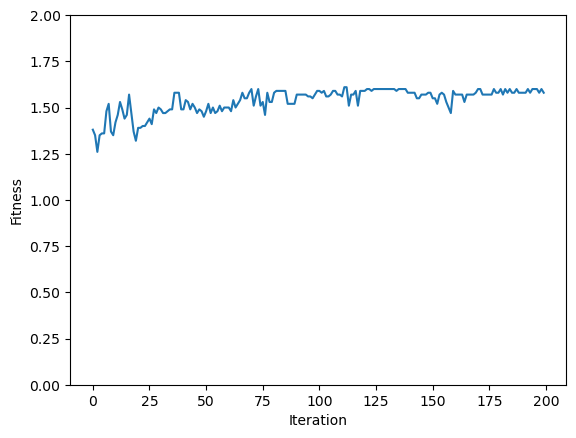

In [18]:
fitness1=[]
iteri =[]
for i in fitnesses:
    fitness1.append(round(i,2))
for i in range(max_iters):
    iteri.append(i)
plt.plot(iteri,fitness1)
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.ylim(0,2)
plt.show()